In [1]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
import io
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp

In [3]:
def load_mocap_csv(file):
    with open(file, 'r') as f:
        lines = f.read().split('\n')

    data = pd.read_csv(io.BytesIO('\n'.join(lines[3:]).encode()))
    data = data.rename(columns={'Unnamed: 0': 'Frame',
                                'Unnamed: 1': 'Time', 0
                                'capo': 'capo.a', 
                                'capo.1': 'capo.b',
                                'capo.2': 'capo.c', 
                                'capo.3': 'capo.d',
                                'capo.4': 'capo.x',5
                                'capo.5': 'capo.y', 6
                                'capo.6': 'capo.z', 7
                                'capo.7': 'capo.Error Per Marker', 8
                                'caps': 'caps.a', 9
                                'caps.1': 'caps.b',
                                'caps.2': 'caps.c', 11
                                'caps.3': 'caps.d',12
                                'caps.4': 'caps.x',13
                                'caps.5': 'caps.y',14
                                'caps.6': 'caps.z',15
                                'caps.7': 'caps.Error Per Marker'})
    data = data.loc[:, ['Frame', 'Time', 'capo.a', 'capo.b', 'capo.c', 'capo.d', 'capo.x', 'capo.y', 'capo.z', 'capo.Error Per Marker', 'caps.a', 'caps.b', 'caps.c', 'caps.d', 'caps.x', 'caps.y', 'caps.z', 'caps.Error Per Marker']]
    data = data.iloc[3:]
    data = data.set_index('Frame')
    data = data.astype(float)
    data.index = data.index.astype(int)
    
    return data

In [13]:
#data = load_mocap_csv('Take 2019-12-08 05.03.55 PM Pose 1.csv')
data = load_mocap_csv('human_data/pose1a.csv')
print(data.head())
print(data.iloc[0, 1])

           Time    capo.a    capo.b    capo.c    capo.d    capo.x    capo.y  \
Frame                                                                         
0      0.000000  0.109082  0.985618 -0.071784  0.107267  0.390546  1.761362   
1      0.016667  0.109289  0.985475 -0.070085  0.109469  0.391143  1.761961   
2      0.033333  0.110492  0.985703 -0.067940  0.107546  0.392340  1.762468   
3      0.050000  0.110073  0.985733 -0.067840  0.107760  0.393356  1.763203   
4      0.066667  0.112852  0.985389 -0.066858  0.108641  0.395161  1.763974   

         capo.z  capo.Error Per Marker    caps.a    caps.b    caps.c  \
Frame                                                                  
0      2.284235               0.001863  0.194161  0.617768 -0.000329   
1      2.285527               0.002203  0.194881  0.616323 -0.000231   
2      2.285971               0.001910  0.195268  0.616511  0.001145   
3      2.286890               0.001737  0.195637  0.616973 -0.001365   
4      2.28734

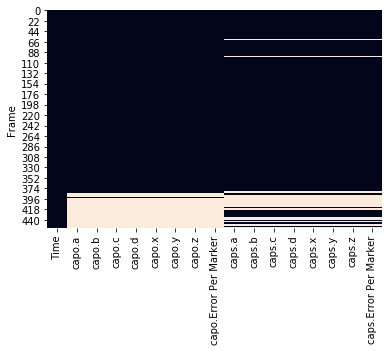

In [5]:
sns.heatmap(data.isnull(), cbar=False);

In [14]:
def euclidean_distance(first_pos, second_pos):
    if ((len(first_pos) != 3) or (len(second_pos) != 3)):
        print("Pos argument is incomplete")
    return ((first_pos[0] - second_pos[0])^2 + (first_pos[1] - second_pos[1])^2 + (first_pos[2] - second_pos[2])^2)^0.5

In [27]:
def get_min_distance(data):
    
    min_dist = 100
    for i in range(len(data.index)):
        o_x = data.iloc[i, 5]
        o_z = data.iloc[i, 7]

        s_x = data.iloc[i, 13]
        s_z = data.iloc[i, 15]

        if np.isnan(o_x) or np.isnan(o_z) or np.isnan(s_x) or np.isnan(s_z):
            continue

        #dist = euclidean_distance([o_x, 0, o_z], [s_x, 0, s_z])
        print([o_x, o_z], [s_x, s_z])
        dist = sp.spatial.distance.euclidean([o_x, o_z], [s_x, s_z])
        print(dist)
        if (dist < min_dist):
            min_dist = dist
            #min_time_stamp = data.iloc[i, 0]

    print("Minimum distance is ", min_dist)

get_min_distance(data)
    

[0.390546, 2.284235] [1.069153, 2.74837]
0.8221488664919512
[0.391143, 2.285527] [1.068619, 2.74725]
0.8198547793999862
[0.39234, 2.285971] [1.068486, 2.746564]
0.8181193830762109
[0.393356, 2.28689] [1.068438, 2.746208]
0.8165223400789473
[0.395161, 2.28734] [1.068422, 2.745392]
0.8143046167282855
[0.397133, 2.287869] [1.068192, 2.744602]
0.8117420863611791
[0.399359, 2.287726] [1.067797, 2.743689]
0.809142519716397
[0.401721, 2.288049] [1.067676, 2.743361]
0.8067249093520047
[0.404402, 2.287956] [1.067225, 2.741925]
0.8033817164275028
[0.407466, 2.287537] [1.067094, 2.741073]
0.8005023433319856
[0.410369, 2.287207] [1.06693, 2.740776]
0.797995729613887
[0.41339, 2.286516] [1.066868, 2.739811]
0.7953048808532485
[0.416541, 2.286298] [1.066905, 2.73919]
0.7925178207207708
[0.419813, 2.285451] [1.066784, 2.738405]
0.7897713599245038
[0.42346, 2.284524] [1.066439, 2.737239]
0.7863668772691281
[0.426376, 2.28415] [1.06644, 2.735926]
0.7834433472000386
[0.42955, 2.283782] [1.0664, 2.734574

In [52]:
def get_xz_one_agent(data):
    ''' Takes in dataframe data that has the cleaned data from OptiTrack
    '''
    list_of_positions = []
    for i in range(len(data.index)):
    #for i in range(200):
        time = data.iloc[i][0]
        o_x = data.iloc[i][5]
        o_z = data.iloc[i][7]
        if np.isnan(o_x) or np.isnan(o_z):
            continue
        tupl = (time, o_x, o_z)
        print(tupl)
        
        list_of_positions.append((time, o_x, o_z))
    
    print(list_of_positions)
    print
    print("Length: ", len(list_of_positions))
        

In [53]:
get_xz_one_agent(data)

(0.0, 0.390546, 2.284235)
(0.016667, 0.391143, 2.285527)
(0.033333, 0.39234, 2.285971)
(0.05, 0.393356, 2.28689)
(0.066667, 0.395161, 2.28734)
(0.083333, 0.397133, 2.287869)
(0.1, 0.399359, 2.287726)
(0.116667, 0.401721, 2.288049)
(0.133333, 0.404402, 2.287956)
(0.15, 0.407466, 2.287537)
(0.166667, 0.410369, 2.287207)
(0.183333, 0.41339, 2.286516)
(0.2, 0.416541, 2.286298)
(0.216667, 0.419813, 2.285451)
(0.233333, 0.42346, 2.284524)
(0.25, 0.426376, 2.28415)
(0.266667, 0.42955, 2.283782)
(0.283333, 0.4333, 2.283098)
(0.3, 0.436438, 2.282984)
(0.316667, 0.439926, 2.281945)
(0.333333, 0.443793, 2.281653)
(0.35, 0.447006, 2.281384)
(0.366667, 0.450396, 2.280772)
(0.383333, 0.454401, 2.279689)
(0.4, 0.457485, 2.27952)
(0.416667, 0.461173, 2.279437)
(0.433333, 0.464435, 2.278785)
(0.45, 0.467149, 2.27884)
(0.466667, 0.47031, 2.278723)
(0.483333, 0.473659, 2.278058)
(0.5, 0.476848, 2.277372)
(0.516667, 0.479104, 2.277628)
(0.533333, 0.481364, 2.277086)
(0.55, 0.484341, 2.276372)
(0.566667, 0